# Questions:
- In this project, we want to address the question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, 
and how do these features differ between various player types?
- we want to determine whether demographic and engagement variables such as Age, Gender, Experience, and Played Hours can predict whether a player subscribes to the newsletter.
- The dataset will help us  address the question beacuse the  dataset links player demographics and behaviour with subscription status, and this enable us to  predict the engagement levels.
- For the wrangling i want to Handle missing ages, encode categorical variables, and examine extreme playtime values.

 # Data Description:

The dataset is  collected from a Minecraft research server operated by UBC
-A  UBC Computer Science research group led by Frank Wood is studying how people play video games using a Minecraft server. Players join the server and complete a  survey and the server  records their in game actions and total playtime.
- Each row shows a player and combines demographic and behavioural information 
- Number of variables: 7
- Number of observations: 196
- Unit of observation: Individual player

 ## Variables
### 1-experience:
- categorical variable
-   player’s self-reported their  gaming experience level( Beginner, Intermediate, or Advanced)
-   no missing values for this variable observed
- 
### 2-subscribe:
-  boolean variable
-  it shows  whether the player subscribed to the newsletter or not . TRUE means the player subscribed, and FALSE means they did not
-   no missing values.
### 3-hashedEmail:
- string variable
-  unique player id 
-   no missing values

### 4-played hours:
- numeric variable
- it shows  total number of hours the player has spent on the Minecraft server
-  no missing values
### 5-name :
- string variable
-  player’s  username in the game
-  no missing values
### 6-gender :
- categorical variable
-  shows player’s self-identified gender
-   no missing values 
### 7-Age :
- numeric variable
- shows  player’s age
-  This variable contains 2 missing values.

# summary statistics:
-played hours:
-   mean: 5.85 hours
- standard deviation : 28.36
-  minimum : 0.00
-  median : 0.10
-   maximum : 223.10 hours
  
-Age:
-  mean : 21.14 years
-    standard deviation : 7.39
-    minimum : 9.00
-  median : 19.00
- maximum : 58.00 years

  # Insights

 Potential issues: 
- there are  Outliers and skewness in playtime
- minor missing data
-  reported variables may be inaccurate


In [33]:
library(tidyverse)

# Load the dataset
players <- read_csv("players.csv")



Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [34]:
players <- players %>%
  mutate(
    experience = as.factor(experience),
    gender = as.factor(gender),
    subscribe = as.logical(subscribe)
  )
players_clean <- players %>%
  filter(!is.na(Age))


In [35]:
players %>%
  summarise(
    mean_age = round(mean(Age, na.rm = TRUE), 2),
    mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2)
  )

mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


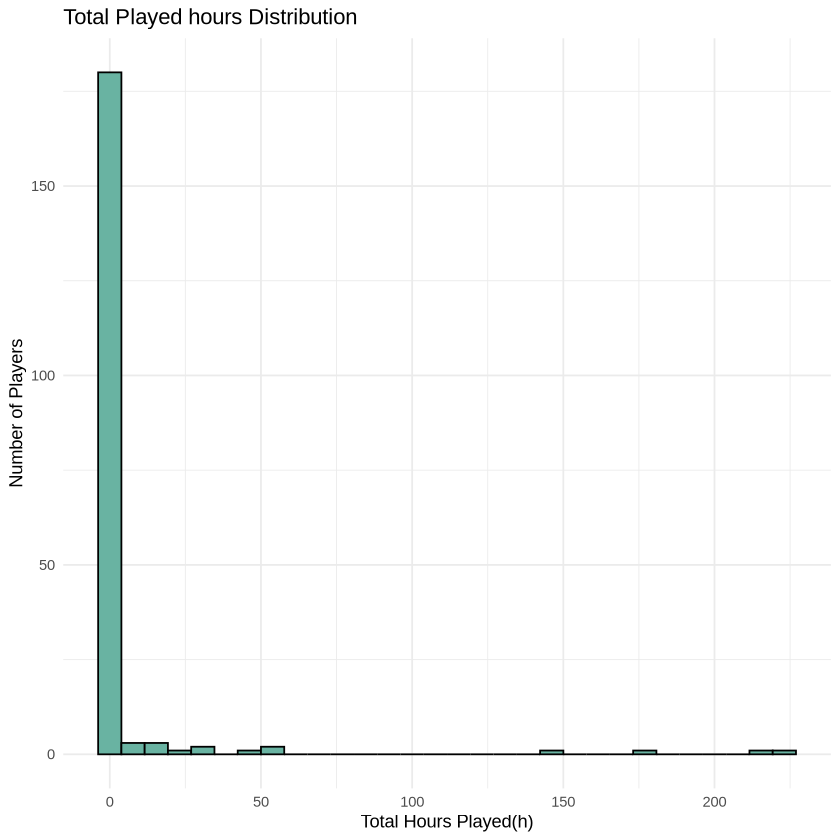

In [36]:
ggplot(players, aes(x = played_hours)) +
  geom_histogram(bins = 30, fill = "#69b3a2", color = "black") +
  labs(title = "Total Played hours Distribution  ",
       x = "Total Hours Played(h)",
       y = "Number of Players") +
  theme_minimal()


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


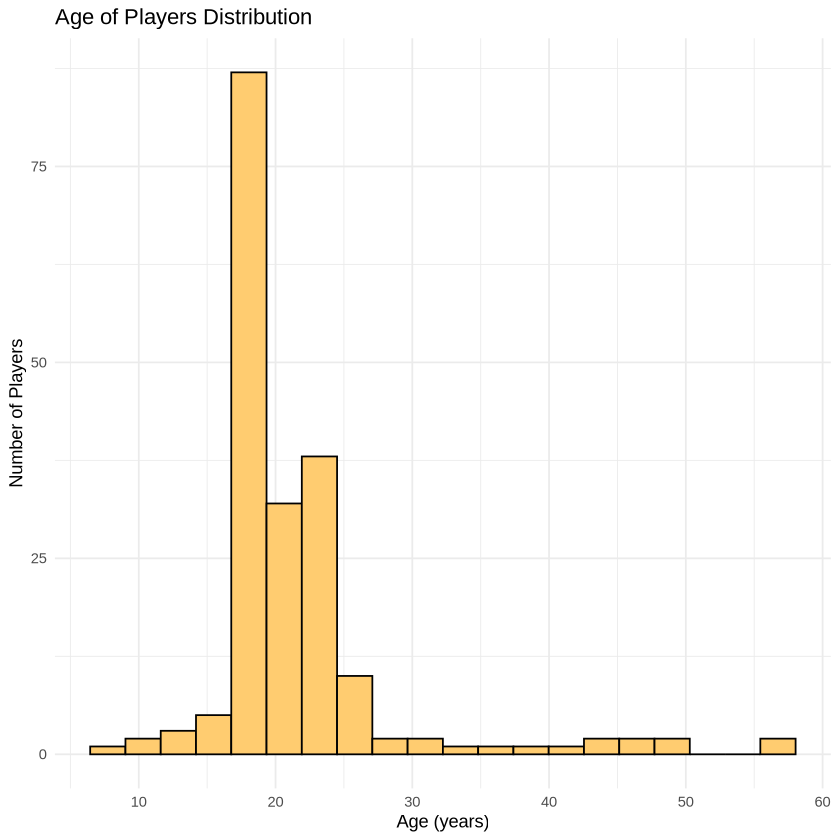

In [37]:
ggplot(players, aes(x = Age)) +
  geom_histogram(bins = 20, fill = "#ffcc70", color = "black") +
  labs(title = "Age of Players Distribution ",
       x = "Age (years)", 
       y = "Number of Players") +
  theme_minimal()


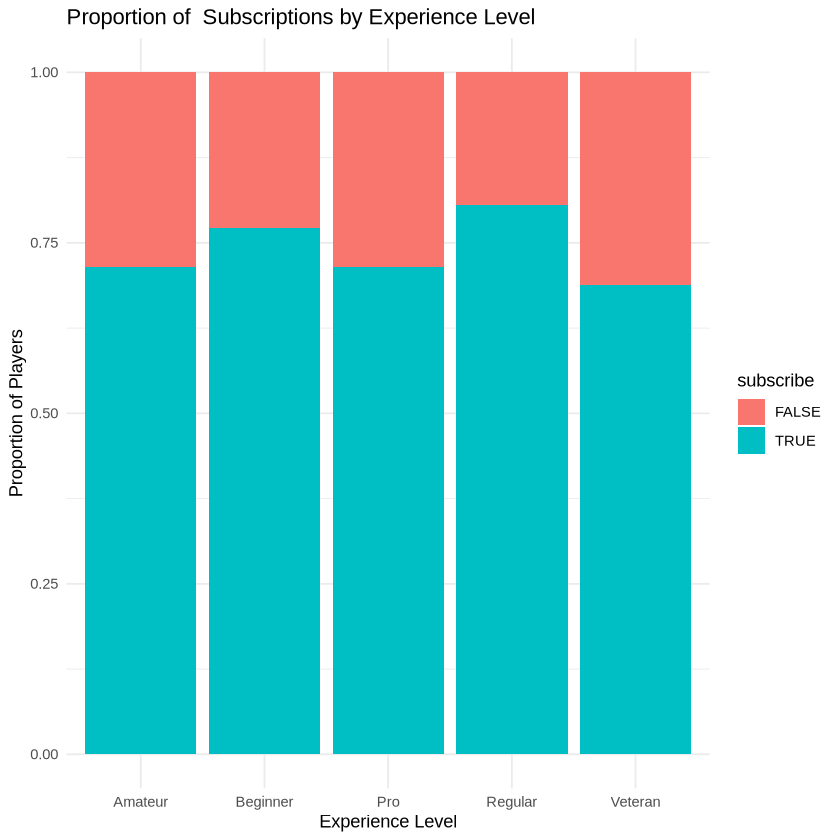

In [38]:
ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of  Subscriptions by Experience Level",
       x = "Experience Level",
       y = "Proportion of Players") +
  theme_minimal()


#  Exploratory Data Analysis


- Played hours are heavily skewed and outliers can be observed 
- there is a  correlation  with subscription and  experience level .
-  Age distribution is concentrated between 17–23. 

# Methods and Plan
A linear regression model will be used for this project, as we believe it allows us to understand how each predictor is associated with changes in the subscription outcome. The main assumption we make is that each observation is independent of every other observation, meaning each player is treated as a separate and unrelated individual.
For data processing, we will encode categorical variables and split the data into 75% training and 25% testing, using 5-fold cross-validation on the training set. Predictive performance will be assessed using metrics such as RMSE and R² on the test set.
We believe the main limitations of this project are the relatively small sample size and the presence of outliers, which can strongly influence the results.

https://github.com/Taniagh82/Data-science-Individual-Planning-Report